In [1]:
#Trabajo Práctico Individual de Python

In [2]:
#Ejercicio 1 

In [3]:
import pandas as pd

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")
except pd.errors.ParserError:
    print("Error: No se pudo parsear el archivo 'productos_tp.csv'. Verifica el formato del archivo.")
else:
    # Mostrar las primeras 10 filas del dataset
    print("# Primeras 10 filas del dataset:")
    print(df.head(10))

    # Mostrar información general sobre el dataset
    print("\n# Información general sobre el dataset:")
    print(f"Filas: {df.shape[0]}")
    print(f"Columnas: {df.shape[1]}")
    print(df.info())

    # Mostrar los tipos de datos de cada columna
    print("\n# Tipos de datos de cada columna:")
    print(df.dtypes)

# Primeras 10 filas del dataset:
   ID   Nombre del Producto   Categoría  Precio Unitario  Cantidad Vendida  \
0   1             iPhone 14  Smartphone           999.99                 5   
1   2         Galaxy Tab S8      Tablet           699.99                 3   
2   3           MacBook Air      Laptop          1299.99                 2   
3   4           AirPods Pro  Accesorios           249.99                10   
4   5       Sony WH-1000XM5       Audio           349.99                 4   
5   6             iPhone 13  Smartphone           799.99                 6   
6   7       Xiaomi Mi Pad 6      Tablet           499.99                 8   
7   8           Dell XPS 13      Laptop          1499.99                 1   
8   9  Apple Watch Series 8  Accesorios           399.99                 7   
9  10  Bose QuietComfort 45       Audio           329.99                 5   

  Fecha de Venta Sucursal  
0     2023-01-01    Norte  
1     2023-01-05      Sur  
2     2023-01-10     Est

In [4]:
#Ejercicio 2

In [5]:
# Importar la biblioteca pandas
import pandas as pd

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")
except pd.errors.ParserError:
    print("Error: No se pudo parsear el archivo 'productos_tp.csv'. Verifica el formato del archivo.")
else:
    try:
        # Verificar si existen datos faltantes en cada una de las columnas
        print("Datos faltantes en cada columna:")
        print(df.isnull().sum())

        # Verificar el porcentaje de datos faltantes en cada columna
        print("\nPorcentaje de datos faltantes en cada columna:")
        print(df.isnull().mean() * 100)

        # Identificar columnas con datos faltantes
        columnas_con_datos_faltantes = df.columns[df.isnull().any()].tolist()
        if not columnas_con_datos_faltantes:
            print("\nNo hay columnas con datos faltantes.")
        else:
            print(f"\nColumnas con datos faltantes: {columnas_con_datos_faltantes}")

            # Proponer soluciones para cada columna con datos faltantes
            for columna in columnas_con_datos_faltantes:
                print(f"\nColumna: {columna}")
                print(f"Tipo de dato: {df[columna].dtype}")
                print(f"Número de datos faltantes: {df[columna].isnull().sum()}")
                
                # Proponer solución según el tipo de dato
                if df[columna].dtype == 'object':
                    print("Solución propuesta: Completar con el valor más frecuente o eliminar registros")
                elif df[columna].dtype == 'int64' or df[columna].dtype == 'float64':
                    print("Solución propuesta: Completar con el promedio o la mediana")
                else:
                    print("Solución propuesta: Eliminar registros o imputar datos")
    except Exception as e:
        print(f"Error inesperado: {e}")



        
# Ejemplo de cómo completar datos faltantes con el promedio
# df['Precio Unitario'] = df['Precio Unitario'].fillna(df['Precio Unitario'].mean())

# Ejemplo de cómo completar datos faltantes con el valor más frecuente
# df['Sucursal'] = df['Sucursal'].fillna(df['Sucursal'].mode()[0])


#En este código, se implementan excepciones para manejar los siguientes errores:

#    FileNotFoundError, pd.errors.EmptyDataError y pd.errors.ParserError: se producen cuando hay problemas al cargar el archivo CSV.
#    Exception: se produce cuando hay un error inesperado al procesar el DataFrame.

#Si se produce alguno de estos errores, se imprime un mensaje de error y se detiene la ejecución del código. Si no se producen errores, se ejecuta el código normalmente y se muestra la información sobre los datos faltantes en el DataFrame.

Datos faltantes en cada columna:
ID                     0
Nombre del Producto    0
Categoría              0
Precio Unitario        0
Cantidad Vendida       0
Fecha de Venta         0
Sucursal               0
dtype: int64

Porcentaje de datos faltantes en cada columna:
ID                     0.0
Nombre del Producto    0.0
Categoría              0.0
Precio Unitario        0.0
Cantidad Vendida       0.0
Fecha de Venta         0.0
Sucursal               0.0
dtype: float64

No hay columnas con datos faltantes.


In [6]:
#Ejercicio 3

In [16]:
# Importar la biblioteca pandas
import pandas as pd

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")
except pd.errors.ParserError:
    print("Error: No se pudo parsear el archivo 'productos_tp.csv'. Verifica el formato del archivo.")
else:
    try:
        # Crear la función analisis_basico
        def analisis_basico(df):
            # Verificar si las columnas necesarias existen en el DataFrame
            columnas_necesarias = ['Nombre del Producto', 'Cantidad Vendida', 'Precio Unitario']
            if not all(columna in df.columns for columna in columnas_necesarias):
                raise ValueError("Error: El DataFrame no contiene todas las columnas necesarias.")

            # Calcular el total de ventas
            total_ventas = df['Cantidad Vendida'].sum()
            print(f"**Total de ventas:** {total_ventas}")

            # Identificar el producto más vendido
            producto_mas_vendido = df.groupby('Nombre del Producto')['Cantidad Vendida'].sum().idxmax()
            cantidad_mas_vendida = df.groupby('Nombre del Producto')['Cantidad Vendida'].sum().max()
            print(f"**Producto más vendido:** {producto_mas_vendido} con {cantidad_mas_vendida} unidades vendidas")

            # Calcular el ingreso total por producto
            df['Ingreso'] = df['Precio Unitario'] * df['Cantidad Vendida']
            producto_mayor_ingreso = df.groupby('Nombre del Producto')['Ingreso'].sum().idxmax()
            ingreso_mayor = df.groupby('Nombre del Producto')['Ingreso'].sum().max()
            print(f"**Producto que generó mayor ingreso:** {producto_mayor_ingreso} con un ingreso de ${ingreso_mayor:.2f}")

            # Calcular el promedio de precio de los productos
            promedio_precio = df['Precio Unitario'].mean()
            print(f"**Promedio de precio de los productos:** ${promedio_precio:.2f}")

        # Llamar a la función analisis_basico
        analisis_basico(df)
    except ValueError as e:
        print(e)
    except Exception as e:
        print(f"Error inesperado: {e}")


"""
Esta función realiza las siguientes tareas:

    1-Calcula el total de ventas sumando la columna "Cantidad Vendida".
    2-Identifica el producto más vendido agrupando por "Nombre del Producto" y sumando la "Cantidad Vendida".
    3-Calcula el ingreso total por producto multiplicando "Precio Unitario" por "Cantidad Vendida" y luego identifica el producto con mayor ingreso.
    4-Calcula el promedio de precio de los productos promediando la columna "Precio Unitario".

La función muestra los resultados en pantalla con un formato claro y conciso.


Excepciones 

En este código, se implementan excepciones para manejar los siguientes errores:

    FileNotFoundError, pd.errors.EmptyDataError y pd.errors.ParserError: se producen cuando hay problemas al cargar el archivo CSV.
    ValueError: se produce cuando el DataFrame no contiene todas las columnas necesarias.
    Exception: se produce cuando hay un error inesperado al procesar el DataFrame.

Si se produce alguno de estos errores, se imprime un mensaje de error y se detiene la ejecución del código. Si no se producen errores, se ejecuta el código normalmente y se muestra el análisis básico del DataFrame.

"""

**Total de ventas:** 372
**Producto más vendido:** Amazon Echo Dot con 20 unidades vendidas
**Producto que generó mayor ingreso:** Xiaomi Mi 12 con un ingreso de $6999.90
**Promedio de precio de los productos:** $669.19


'\nEsta función realiza las siguientes tareas:\n\n    1-Calcula el total de ventas sumando la columna "Cantidad Vendida".\n    2-Identifica el producto más vendido agrupando por "Nombre del Producto" y sumando la "Cantidad Vendida".\n    3-Calcula el ingreso total por producto multiplicando "Precio Unitario" por "Cantidad Vendida" y luego identifica el producto con mayor ingreso.\n    4-Calcula el promedio de precio de los productos promediando la columna "Precio Unitario".\n\nLa función muestra los resultados en pantalla con un formato claro y conciso.\n\n\nExcepciones \n\nEn este código, se implementan excepciones para manejar los siguientes errores:\n\n    FileNotFoundError, pd.errors.EmptyDataError y pd.errors.ParserError: se producen cuando hay problemas al cargar el archivo CSV.\n    ValueError: se produce cuando el DataFrame no contiene todas las columnas necesarias.\n    Exception: se produce cuando hay un error inesperado al procesar el DataFrame.\n\nSi se produce alguno de es

In [7]:
#Ejercicio 4

In [17]:
# Importar la biblioteca pandas
import pandas as pd

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")
except pd.errors.ParserError:
    print("Error: No se pudo parsear el archivo 'productos_tp.csv'. Verifica el formato del archivo.")
else:
    try:
        # Crear la función analisis_por_categoria
        def analisis_por_categoria(df, categoria):
            # Verificar si la categoría es una cadena vacía
            if not categoria.strip():
                print("Error: La categoría no puede estar vacía.")
                return

            # Filtrar el DataFrame por la categoría seleccionada
            df_categoria = df[df['Categoría'] == categoria]

            # Verificar si la categoría existe en el DataFrame
            if df_categoria.empty:
                print(f"No se encontraron productos en la categoría '{categoria}'")
                return

            # Calcular la cantidad total de productos vendidos en esa categoría
            cantidad_total = df_categoria['Cantidad Vendida'].sum()
            print(f"**Cantidad total de productos vendidos en '{categoria}':** {cantidad_total}")

            # Calcular el precio promedio de los productos de esa categoría
            precio_promedio = df_categoria['Precio Unitario'].mean()
            print(f"**Precio promedio de los productos en '{categoria}':** ${precio_promedio:.2f}")

            # Identificar el producto más caro de esa categoría
            if df_categoria['Precio Unitario'].max() == df_categoria['Precio Unitario'].min():
                print(f"**Todos los productos en '{categoria}' tienen el mismo precio:** ${df_categoria['Precio Unitario'].max():.2f}")
            else:
                producto_mas_caro = df_categoria.loc[df_categoria['Precio Unitario'].idxmax()]
                print(f"**Producto más caro en '{categoria}':** {producto_mas_caro['Nombre del Producto']} con un precio de ${producto_mas_caro['Precio Unitario']:.2f}")

                # Identificar el producto más barato de esa categoría
                producto_mas_barato = df_categoria.loc[df_categoria['Precio Unitario'].idxmin()]
                print(f"**Producto más barato en '{categoria}':** {producto_mas_barato['Nombre del Producto']} con un precio de ${producto_mas_barato['Precio Unitario']:.2f}")

        # Llamar a la función analisis_por_categoria
        categoria = input("Ingrese el nombre de la categoría: ")
        analisis_por_categoria(df, categoria)
    except KeyError as e:
        print(f"Error: La columna '{e}' no existe en el DataFrame.")
    except Exception as e:
        print(f"Error inesperado: {e}")
'''
En este código, se implementan excepciones para manejar los siguientes errores:

    FileNotFoundError, pd.errors.EmptyDataError y pd.errors.ParserError: se producen cuando hay problemas al cargar el archivo CSV.
    KeyError: se produce cuando una columna necesaria no existe en el DataFrame.
    Exception: se produce cuando hay un error inesperado al procesar el DataFrame.

Si se produce alguno de estos errores, se imprime un mensaje de error y se detiene la ejecución del código. Si no se producen errores, se 
ejecuta el código normalmente y se muestra el análisis por categoría.
'''

Ingrese el nombre de la categoría:  Tablet


**Cantidad total de productos vendidos en 'Tablet':** 41
**Precio promedio de los productos en 'Tablet':** $591.66
**Producto más caro en 'Tablet':** iPad Pro con un precio de $1099.99
**Producto más barato en 'Tablet':** Amazon Fire HD 10 con un precio de $149.99


'\nEn este código, se implementan excepciones para manejar los siguientes errores:\n\n    FileNotFoundError, pd.errors.EmptyDataError y pd.errors.ParserError: se producen cuando hay problemas al cargar el archivo CSV.\n    KeyError: se produce cuando una columna necesaria no existe en el DataFrame.\n    Exception: se produce cuando hay un error inesperado al procesar el DataFrame.\n\nSi se produce alguno de estos errores, se imprime un mensaje de error y se detiene la ejecución del código. Si no se producen errores, se \nejecuta el código normalmente y se muestra el análisis por categoría.\n'

In [9]:
#Ejercicio 5

In [10]:
# Importar la biblioteca pandas
import pandas as pd

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")

# Crear la función ventas_por_sucursal
def ventas_por_sucursal(df):
    # Calcular el total de ventas por sucursal (en cantidad de productos)
    total_ventas_por_sucursal = df.groupby('Sucursal')['Cantidad Vendida'].sum()
    print("**Total de ventas por sucursal:**")
    print(total_ventas_por_sucursal)

    # Calcular el total de ingresos por sucursal (Precio × Cantidad)
    df['Ingreso'] = df['Precio Unitario'] * df['Cantidad Vendida']
    total_ingresos_por_sucursal = df.groupby('Sucursal')['Ingreso'].sum()
    print("\n**Total de ingresos por sucursal:**")
    print(total_ingresos_por_sucursal)

    # Identificar la categoría más vendida en cada sucursal
    categoria_mas_vendida_por_sucursal = df.groupby(['Sucursal', 'Categoría'])['Cantidad Vendida'].sum().reset_index()
    categoria_mas_vendida_por_sucursal = categoria_mas_vendida_por_sucursal.loc[categoria_mas_vendida_por_sucursal.groupby('Sucursal')['Cantidad Vendida'].idxmax()]
    print("\n**Categoría más vendida en cada sucursal:**")
    print(categoria_mas_vendida_por_sucursal[['Sucursal', 'Categoría']])

    # Identificar la sucursal con mayor volumen de ventas
    sucursal_con_mayor_ventas = total_ventas_por_sucursal.idxmax()
    print(f"\n**Sucursal con mayor volumen de ventas:** {sucursal_con_mayor_ventas} con {total_ventas_por_sucursal.max()} unidades vendidas")

# Llamar a la función ventas_por_sucursal
ventas_por_sucursal(df)


"""
Esta función realiza las siguientes tareas:

    1-Calcula el total de ventas por sucursal (en cantidad de productos) utilizando groupby y sum.
    2-Calcula el total de ingresos por sucursal (Precio × Cantidad) creando una columna "Ingreso" y luego utilizando groupby y sum.
    3-Identifica la categoría más vendida en cada sucursal utilizando groupby y idxmax.
    4-Identifica la sucursal con mayor volumen de ventas utilizando idxmax.

La función muestra los resultados en pantalla con un formato claro y conciso.


"""

**Total de ventas por sucursal:**
Sucursal
Centro     78
Este       78
Norte      40
Oeste      74
Sur       102
Name: Cantidad Vendida, dtype: int64

**Total de ingresos por sucursal:**
Sucursal
Centro    37249.22
Este      24409.22
Norte     37199.60
Oeste     29399.26
Sur       27348.98
Name: Ingreso, dtype: float64

**Categoría más vendida en cada sucursal:**
   Sucursal   Categoría
1    Centro  Smartphone
4      Este       Audio
8     Norte  Smartphone
10    Oeste  Accesorios
13      Sur  Accesorios

**Sucursal con mayor volumen de ventas:** Sur con 102 unidades vendidas


'\nEsta función realiza las siguientes tareas:\n\n    1-Calcula el total de ventas por sucursal (en cantidad de productos) utilizando groupby y sum.\n    2-Calcula el total de ingresos por sucursal (Precio × Cantidad) creando una columna "Ingreso" y luego utilizando groupby y sum.\n    3-Identifica la categoría más vendida en cada sucursal utilizando groupby y idxmax.\n    4-Identifica la sucursal con mayor volumen de ventas utilizando idxmax.\n\nLa función muestra los resultados en pantalla con un formato claro y conciso.\n\n\n'

In [11]:
#Ejercicio 6

**Ventas totales por mes:**
Mes
2023-01    24
2023-02    27
2023-03    30
2023-04    32
2023-05    56
2023-06    40
2023-07    29
2023-08    55
2023-09    37
2023-10    42
Freq: M, Name: Cantidad Vendida, dtype: int64

**Mes con mayor volumen de ventas:** 2023-05 con 56 unidades vendidas

**Día de la semana con más ventas:** Saturday con 68 unidades vendidas

**Evolución de ventas por categoría a lo largo del tiempo (mensual):**
Categoría  Accesorios  Audio  Laptop  Smartphone  Tablet
Mes                                                     
2023-01          10.0    4.0     2.0         5.0     3.0
2023-02           7.0    5.0     1.0         6.0     8.0
2023-03          12.0    2.0     3.0        13.0     NaN
2023-04           8.0    6.0     6.0        10.0     2.0
2023-05          20.0   15.0     1.0        20.0     NaN
2023-06          25.0    5.0     4.0         6.0     NaN
2023-07           8.0    6.0     2.0        10.0     3.0
2023-08          20.0   10.0     5.0        20.0     N

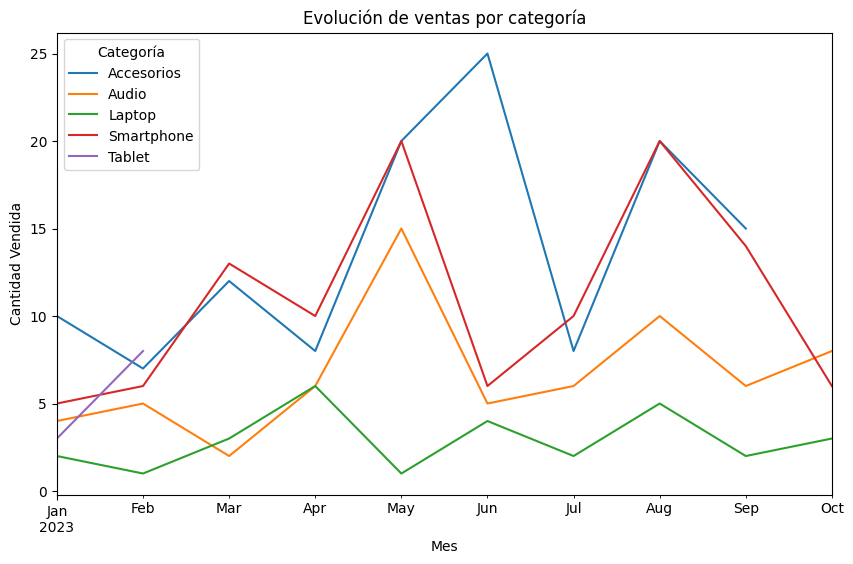

'\nEsta función realiza las siguientes tareas:\n\n    Calcula las ventas totales por mes utilizando groupby y sum.\n    Identifica el mes con mayor volumen de ventas utilizando idxmax.\n    Calcula el día de la semana con más ventas utilizando groupby y idxmax.\n    Calcula la evolución de ventas por categoría a lo largo del tiempo (mensual) utilizando groupby y unstack.\n    Grafica la evolución de ventas por categoría utilizando plot.\n\nLa función muestra los resultados en pantalla con un formato claro y conciso, y también muestra una gráfica de la evolución de ventas por categoría.\n\n'

In [18]:
# Importar la biblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")


# Convertir la columna 'Fecha de Venta' a datetime
df['Fecha de Venta'] = pd.to_datetime(df['Fecha de Venta'])

# Crear la función analisis_temporal
def analisis_temporal(df):
    # Calcular las ventas totales por mes
    df['Mes'] = df['Fecha de Venta'].dt.to_period('M')
    ventas_por_mes = df.groupby('Mes')['Cantidad Vendida'].sum()
    print("**Ventas totales por mes:**")
    print(ventas_por_mes)

    # Identificar el mes con mayor volumen de ventas
    mes_con_mayor_ventas = ventas_por_mes.idxmax()
    print(f"\n**Mes con mayor volumen de ventas:** {mes_con_mayor_ventas} con {ventas_por_mes.max()} unidades vendidas")

    # Calcular el día de la semana con más ventas
    df['Día de la semana'] = df['Fecha de Venta'].dt.day_name()
    ventas_por_dia = df.groupby('Día de la semana')['Cantidad Vendida'].sum()
    dia_con_mas_ventas = ventas_por_dia.idxmax()
    print(f"\n**Día de la semana con más ventas:** {dia_con_mas_ventas} con {ventas_por_dia.max()} unidades vendidas")

    # Calcular la evolución de ventas por categoría a lo largo del tiempo (mensual)
    ventas_por_categoria_y_mes = df.groupby(['Mes', 'Categoría'])['Cantidad Vendida'].sum().unstack()
    print("\n**Evolución de ventas por categoría a lo largo del tiempo (mensual):**")
    print(ventas_por_categoria_y_mes)

    # Graficar la evolución de ventas por categoría
    ventas_por_categoria_y_mes.plot(kind='line', figsize=(10, 6))
    plt.title('Evolución de ventas por categoría')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad Vendida')
    plt.legend(title='Categoría')
    plt.show()

# Llamar a la función analisis_temporal
analisis_temporal(df)


"""
Esta función realiza las siguientes tareas:

    Calcula las ventas totales por mes utilizando groupby y sum.
    Identifica el mes con mayor volumen de ventas utilizando idxmax.
    Calcula el día de la semana con más ventas utilizando groupby y idxmax.
    Calcula la evolución de ventas por categoría a lo largo del tiempo (mensual) utilizando groupby y unstack.
    Grafica la evolución de ventas por categoría utilizando plot.

La función muestra los resultados en pantalla con un formato claro y conciso, y también muestra una gráfica de la evolución de ventas por categoría.

"""

In [13]:
#Ejercicio 7

In [19]:
# Importar la biblioteca pandas
import pandas as pd

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")


# Crear la función top_productos
def top_productos(df, N):
    # Calcular la cantidad total de unidades vendidas por producto
    df_ventas = df.groupby('Nombre del Producto')['Cantidad Vendida'].sum().reset_index()
    df_ventas = df_ventas.sort_values(by='Cantidad Vendida', ascending=False).head(N)
    print("**Top {} productos con mayor cantidad de unidades vendidas:**".format(N))
    print(df_ventas)

    # Calcular el ingreso total generado por producto
    df['Ingreso'] = df['Precio Unitario'] * df['Cantidad Vendida']
    df_ingreso = df.groupby('Nombre del Producto')['Ingreso'].sum().reset_index()
    df_ingreso = df_ingreso.sort_values(by='Ingreso', ascending=False).head(N)
    print("\n**Top {} productos con mayor ingreso total generado:**".format(N))
    print(df_ingreso)

# Llamar a la función top_productos
N = 5
top_productos(df, N)


"""

Esta función realiza las siguientes tareas:

    Calcula la cantidad total de unidades vendidas por producto utilizando groupby y sum.
    Ordena los productos por cantidad de unidades vendidas en orden descendente y selecciona los N productos con mayor cantidad de unidades vendidas.
    Calcula el ingreso total generado por producto utilizando groupby y sum.
    Ordena los productos por ingreso total generado en orden descendente y selecciona los N productos con mayor ingreso total generado.

La función imprime los resultados de forma clara y ordenada, mostrando los N productos con mayor cantidad de unidades vendidas y mayor ingreso total generado. 


"""

**Top 5 productos con mayor cantidad de unidades vendidas:**
      Nombre del Producto  Cantidad Vendida
1         Amazon Echo Dot                20
13       Google Nest Mini                20
2       Amazon Fire HD 10                15
30  Razer BlackWidow Lite                15
24   Logitech MX Master 3                15

**Top 5 productos con mayor ingreso total generado:**
   Nombre del Producto  Ingreso
40        Xiaomi Mi 12  6999.90
17        HP Envy x360  5999.94
22  Lenovo ThinkPad X1  5399.97
15      Google Pixel 7  5399.91
37          Sony A7 IV  4999.98


'\n\nEsta función realiza las siguientes tareas:\n\n    Calcula la cantidad total de unidades vendidas por producto utilizando groupby y sum.\n    Ordena los productos por cantidad de unidades vendidas en orden descendente y selecciona los N productos con mayor cantidad de unidades vendidas.\n    Calcula el ingreso total generado por producto utilizando groupby y sum.\n    Ordena los productos por ingreso total generado en orden descendente y selecciona los N productos con mayor ingreso total generado.\n\nLa función imprime los resultados de forma clara y ordenada, mostrando los N productos con mayor cantidad de unidades vendidas y mayor ingreso total generado. \n\n\n'

In [20]:
#Ejercicio 8

In [21]:
# Importar la biblioteca pandas
import pandas as pd

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")


# Crear la función analisis_precios
def analisis_precios(df):
    # Definir los rangos de precio para cada categoría
    bins = [0, 200, 800, float('inf')]
    labels = ['Económico', 'Estándar', 'Premium']

    # Clasificar los productos según su precio
    df['Categoría de precio'] = pd.cut(df['Precio Unitario'], bins=bins, labels=labels)

    # Mostrar cuántos productos hay en cada categoría de precio
    print("**Cantidad de productos por categoría de precio:**")
    print(df['Categoría de precio'].value_counts())

    # Identificar qué categoría de producto tiene más items "Premium"
    df_premium = df[df['Categoría de precio'] == 'Premium']
    categoria_con_mas_premium = df_premium['Categoría'].value_counts().idxmax()
    print(f"\n**La categoría con más items 'Premium' es:** {categoria_con_mas_premium} con {df_premium['Categoría'].value_counts().max()} productos")

# Llamar a la función analisis_precios
analisis_precios(df)



"""
Esta función realiza las siguientes tareas:

    1-Define los rangos de precio para cada categoría de producto ("Económico", "Estándar" y "Premium").
    2-Clasifica los productos según su precio utilizando la función pd.cut.
    3-Muestra cuántos productos hay en cada categoría de precio utilizando value_counts.
    4-Identifica qué categoría de producto tiene más items "Premium" filtrando el DataFrame por productos "Premium" y luego utilizando value_counts para contar la cantidad de productos por categoría.

La función imprime los resultados de forma clara y concisa.

"""

**Cantidad de productos por categoría de precio:**
Categoría de precio
Estándar     23
Premium      15
Económico    12
Name: count, dtype: int64

**La categoría con más items 'Premium' es:** Laptop con 10 productos


'\nEsta función realiza las siguientes tareas:\n\n    1-Define los rangos de precio para cada categoría de producto ("Económico", "Estándar" y "Premium").\n    2-Clasifica los productos según su precio utilizando la función pd.cut.\n    3-Muestra cuántos productos hay en cada categoría de precio utilizando value_counts.\n    4-Identifica qué categoría de producto tiene más items "Premium" filtrando el DataFrame por productos "Premium" y luego utilizando value_counts para contar la cantidad de productos por categoría.\n\nLa función imprime los resultados de forma clara y concisa.\n\n'

In [22]:
#Ejercicio 9

In [23]:
# Importar la biblioteca pandas
import pandas as pd

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")


# Crear la función exportar_resultados
def exportar_resultados(df):
    # Calcular el total vendido y el ingreso total por categoría y sucursal
    df['Ingreso'] = df['Precio Unitario'] * df['Cantidad Vendida']
    resultados = df.groupby(['Categoría', 'Sucursal']).agg({
        'Cantidad Vendida': 'sum',
        'Ingreso': 'sum'
    }).reset_index()
    resultados = resultados.rename(columns={
        'Cantidad Vendida': 'Total Vendido',
        'Ingreso': 'Ingreso Total'
    })

    # Exportar los resultados a un archivo CSV
    resultados.to_csv('resultados_ventas.csv', index=False)

    print("Resultados exportados a resultados_ventas.csv")

# Llamar a la función exportar_resultados
exportar_resultados(df)


"""Esta función realiza las siguientes tareas:

    Calcula el total vendido y el ingreso total por categoría y sucursal utilizando groupby y agg.
    Renombra las columnas para que coincidan con los nombres deseados en el archivo CSV.
    Exporta los resultados a un archivo CSV utilizando to_csv.
    Imprime un mensaje para confirmar que los resultados han sido exportados.
    """

Resultados exportados a resultados_ventas.csv


'Esta función realiza las siguientes tareas:\n\n    Calcula el total vendido y el ingreso total por categoría y sucursal utilizando groupby y agg.\n    Renombra las columnas para que coincidan con los nombres deseados en el archivo CSV.\n    Exporta los resultados a un archivo CSV utilizando to_csv.\n    Imprime un mensaje para confirmar que los resultados han sido exportados.\n    '

In [28]:
#Ejercicio 10 : creación de la Base de Datos y además inserta datos de productos_tp.csv en ventas.db

In [26]:
# Importar las bibliotecas necesarias
import pandas as pd
import sqlite3

# Conectar a la base de datos SQLite
conn = sqlite3.connect('ventas.db')
cursor = conn.cursor()

# Crear la tabla
cursor.execute('''
    CREATE TABLE IF NOT EXISTS ventas (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        "Categoría" TEXT,
        "Sucursal" TEXT,
        "Total Vendido" REAL,
        "Ingreso Total" REAL
    )
''')



# Cargar los datos del CSV en la tabla
df = pd.read_csv('resultados_ventas.csv')
df.to_sql('ventas', conn, if_exists='replace', index=False)

# Realizar consultas SQL
print("**Consulta 1: Ventas totales por categoría**")
cursor.execute('''
    SELECT "Categoría", SUM("Total Vendido") AS total_vendido
    FROM ventas
    GROUP BY "Categoría"
''')
resultados = cursor.fetchall()
for resultado in resultados:
    print(resultado)


print("\n**Consulta 2: Sucursal con mayor ingreso total**")
cursor.execute('''
    SELECT "Sucursal", SUM("Ingreso Total") AS ingreso_total
    FROM ventas
    GROUP BY "Sucursal"
    ORDER BY ingreso_total DESC
    LIMIT 1
''')
resultado = cursor.fetchone()
print(resultado)

print("\n**Consulta 3: Categorías con ventas superiores a 1000**")
cursor.execute('''
    SELECT "Categoría", SUM("Total Vendido") AS "total vendido"
    FROM ventas
    GROUP BY "Categoría"
    HAVING SUM("Total Vendido") > 1000
''')
resultados = cursor.fetchall()
for resultado in resultados:
    print(resultado)

# Crear una función para buscar datos
def buscar_datos(categoria=None, sucursal=None):
    query = '''
        SELECT *
        FROM ventas
    '''
    condiciones = []
    parametros = []

    if categoria:
        condiciones.append('"Categoría" = ?')
        parametros.append(categoria)
    if sucursal:
        condiciones.append('"Sucursal" = ?')
        parametros.append(sucursal)

    if condiciones:
        query += ' WHERE ' + ' AND '.join(condiciones)

    cursor.execute(query, parametros)
    resultados = cursor.fetchall()
    return resultados

# Llamar a la función buscar_datos
resultados = buscar_datos(categoria='Electrónicos', sucursal='Sucursal 1')
for resultado in resultados:
    print(resultado)

# Cerrar la conexión
conn.close()

**Consulta 1: Ventas totales por categoría**
('Accesorios', 125)
('Audio', 67)
('Laptop', 29)
('Smartphone', 110)
('Tablet', 41)

**Consulta 2: Sucursal con mayor ingreso total**
('Centro', 37249.22)

**Consulta 3: Categorías con ventas superiores a 1000**


In [29]:
#Ejercicio 11

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Cargar el archivo CSV
    df = pd.read_csv("productos_tp.csv")
except FileNotFoundError:
    print("Error: El archivo 'productos_tp.csv' no existe en el directorio actual.")
except pd.errors.EmptyDataError:
    print("Error: El archivo 'productos_tp.csv' está vacío.")


def analisis(df):
    # Clasificar los productos según su precio
    bins = [0, 200, 800, float('inf')]
    labels = ['Económico', 'Estándar', 'Premium']
    df['Categoría de precio'] = pd.cut(df['Precio Unitario'], bins=bins, labels=labels)

    # Calcular el margen de ganancia para cada producto
    df['Margen de ganancia'] = df.apply(lambda row: row['Precio Unitario'] * row['Cantidad Vendida'] * {
        'Económico': 0.2,
        'Estándar': 0.25,
        'Premium': 0.3
    }[row['Categoría de precio']], axis=1)

    # Analizar la correlación entre el precio y la cantidad vendida
    correlacion = df['Precio Unitario'].corr(df['Cantidad Vendida'])
    print(f"**Correlación entre el precio y la cantidad vendida:** {correlacion}")

    # Identificar la categoría más rentable en términos de margen de ganancia
    margen_por_categoria = df.groupby('Categoría')['Margen de ganancia'].sum().reset_index()
    categoria_mas_rentable = margen_por_categoria.loc[margen_por_categoria['Margen de ganancia'].idxmax()]
    print(f"\n**Categoría más rentable:** {categoria_mas_rentable['Categoría']} con un margen de ganancia total de {categoria_mas_rentable['Margen de ganancia']}")

    # Identificar la sucursal con la mayor variedad de productos vendidos
    variedad_por_sucursal = df.groupby('Sucursal')['Nombre del Producto'].nunique().reset_index()
    sucursal_con_mayor_variedad = variedad_por_sucursal.loc[variedad_por_sucursal['Nombre del Producto'].idxmax()]
    print(f"\n**Sucursal con mayor variedad de productos vendidos:** {sucursal_con_mayor_variedad['Sucursal']} con {sucursal_con_mayor_variedad['Nombre del Producto']} productos diferentes")

# Llamar a la función analisis
analisis(df)
"""
Esta función realiza las siguientes tareas:

    1-Clasifica los productos según su precio utilizando pd.cut.
    2-Calcula el margen de ganancia para cada producto según su categoría de precio.
    3-Analiza la correlación entre el precio y la cantidad vendida utilizando corr.
    4-Identifica la categoría más rentable en términos de margen de ganancia utilizando groupby y idxmax.
    5-Identifica la sucursal con la mayor variedad de productos vendidos utilizando groupby y nunique.

La función imprime los resultados de forma clara y concisa.



"""

**Correlación entre el precio y la cantidad vendida:** -0.7077764241294242

**Categoría más rentable:** Smartphone con un margen de ganancia total de 16759.7185

**Sucursal con mayor variedad de productos vendidos:** Centro con 10 productos diferentes


'\nEsta función realiza las siguientes tareas:\n\n    1-Clasifica los productos según su precio utilizando pd.cut.\n    2-Calcula el margen de ganancia para cada producto según su categoría de precio.\n    3-Analiza la correlación entre el precio y la cantidad vendida utilizando corr.\n    4-Identifica la categoría más rentable en términos de margen de ganancia utilizando groupby y idxmax.\n    5-Identifica la sucursal con la mayor variedad de productos vendidos utilizando groupby y nunique.\n\nLa función imprime los resultados de forma clara y concisa.\n\n\n\n'